# Лабораторная работа №3: Частотный анализ полиномиальных приближений

Выполнили студенты гр. 2384 Поглазов Никита Васильевич и Вовченко София Евгеньевна. Вариант №14.

## Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.

## Основные теоретические положения

Циклическая частота связана с частотой следующим соотношением:
$\omega = 2 \pi f$

Для подсчета входного сигнала $s(t)$ используется следующая формула

$$ s(t) = \sum_{k=1}^{N} c_k \cdot e^{j 2 \pi f_k t} $$

Для подсчета выходного сигнала $y(t)$ используется следующая формула

$$ y(t) = \sum_{k=1}^{N} c_k \cdot H(\omega_n) \cdot e^{j 2 \pi f_k t} $$
где $H(\omega_n)=\frac{y_n}{s_n}$- передаточная функция рекурсивного фильтра $y_n$ дискретного сигнала $s_n$.

Передаточная функция для круговой частоты и циклической связаны таким образом:
$$H(\omega)=H(2\pi f)=\tilde{H}(f)$$
Перевод значений передаточной функции в логарифмическую шкалу:
$$1dB=20\lg\left(\left|\frac{y_n}{s_n}\right|\right)=20\lg\left(\left|H(\omega)\right|\right)$$

## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики $ \tilde H(f) $. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов.

## Выполнение работы

In [3]:
import numpy as np
import matplotlib.pyplot as plt

- Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам. Построить графики $ \tilde H(f) $. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Входной сигнал s(t). Положим $s(t) = e^{i \omega t}$.

Нерекурсивный фильтр, соответствующий сглаживанию прямой линией, задаётся формулой:

$$y(t) = A + Bt$$

Для нахождения коэффициентов A и B решаем систему уравнений МНК (для окна шириной $2h + 1$):

$$
F_{2h + 1}(A, B) = \sum_{k=-h}^{k=h} (s_k - y_k)^2 = \sum_{k=-h}^{k=h} (s_k - A - Bk)^2 \to \min_{A, B}
$$

Возьмём частные производные по A и B и приравняем их к нулю:

$$
\begin{cases}
\frac{\partial F_{2h + 1}}{\partial A} = -2 \sum_{k=-h}^{k=h} (s_k - A - Bk) = 0 \\
\frac{\partial F_{2h + 1}}{\partial B} = -2 \sum_{k=-h}^{k=h} k(s_k - A - Bk) = 0
\end{cases}
$$

Решая эту систему уравнений, получаем:

$$
\begin{cases}
A = \frac{1}{2h + 1} \sum_{k=-h}^{k=h} s_k \\
B = \frac{3}{h(h + 1)(2h + 1)} \sum_{k=-h}^{k=h} k s_k
\end{cases}
$$

Подставляя $A$ и $B$ в уравнение для $y(t)$, получаем формулу для сглаживания прямой линией по $2h + 1$ точкам:

$$
y(t) = \frac{1}{2h + 1} \sum_{k=-h}^{k=h} s_k + \frac{3t}{h(h + 1)(2h + 1)} \sum_{k=-h}^{k=h} k s_k
$$

Чтобы найти передаточную функцию $H_{2h + 1} (\omega)$, положим $t = 0$, тогда:

$$
y_0 = \frac{1}{2h + 1} \sum_{k=-h}^{k=h} s_k
$$

В общем случае:

$$
\begin{aligned}
y_n &= \frac{1}{2h + 1} \sum_{k=-h}^{k=h} s_{n + k} = \frac{1}{2h + 1} \sum_{k=-h}^{k=h} e^{i \omega (n + k)} \\
&= \frac{e^{i \omega n}}{2h + 1} \sum_{k=-h}^{k=h} e^{i \omega k} = e^{i \omega n} H_{2h + 1} (\omega)
\end{aligned}
$$

Заменим индексы в передаточной функции и воспользуемся формулой суммы геометрической прогрессии:
$$
\begin{aligned}
H_{2h + 1} (\omega) &= \frac{1}{2h + 1} \sum_{k=-h}^{k=h} e^{i \omega k} = \frac{1}{2h + 1} \sum_{k=0}^{k=2h} e^{i \omega (k - h)} = \frac{1}{2h + 1} e^{-i \omega h} \sum_{k=0}^{k=2h} e^{i \omega k} \\
&=  \frac{1}{(2h + 1)} \frac{e^{-i\omega h} (e^{i\omega(2h + 1)} - 1)}{e^{i\omega} - 1} \cdot \frac{e^{-i\omega / 2}}{e^{-i\omega / 2}} 
= \frac{1}{(2h + 1)} \frac{e^{-i\frac{\omega}{2} (2h + 1)} (e^{i\omega(2h + 1)} - 1)}{e^{i\omega/2} - e^{-i\omega/2}}  \\
&= \frac{1}{(2h + 1)} \frac{ (e^{i\frac{\omega}{2}(2h + 1)} - e^{-i\frac{\omega}{2}(2h + 1)})}{e^{i\omega / 2} - e^{-i\omega / 2}}  
= \boxed{\frac{1}{2h + 1} \frac{\sin\left( (2h + 1) \frac{\omega}{2} \right)}{\sin\left( \frac{\omega}{2} \right)}}
\end{aligned}
$$

Итого:
$$
\tilde{H}_{2h+1}(f) = H_{2h + 1} (2 \pi f) = \frac{1}{2h + 1} \cdot \frac{\sin\left( (2h + 1) \pi f \right)}{\sin\left( \pi f \right)}
$$

In [4]:
f = np.linspace(0., 0.5, 500)

In [5]:
def H_tilde_linear(f: np.ndarray, h: int) -> np.ndarray:
    omega_half = np.pi * f
    return np.divide(
        1 / (2 * h + 1) * np.sin(omega_half * (2 * h + 1)), np.sin(omega_half),
        out=np.ones_like(f), where=np.sin(omega_half) != 0,
    )

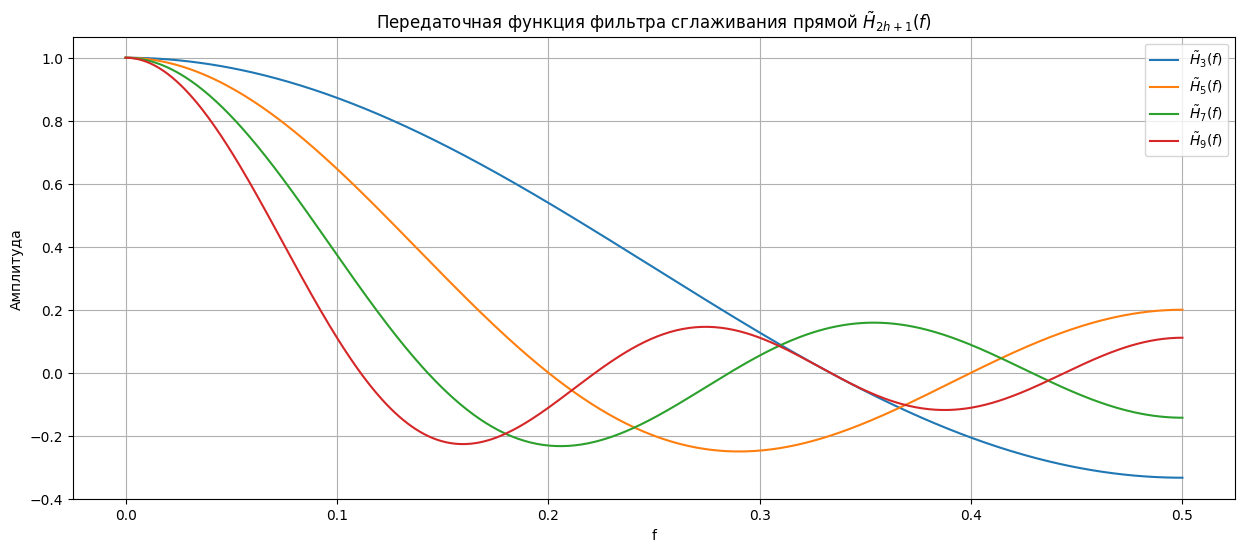

In [6]:
plt.figure(figsize=(15, 6))

for h in range(1, 5):
    plt.plot(f, H_tilde_linear(f, h), label="$ \\tilde{H}_{" + str(2 * h + 1) + "}(f) $")

plt.title('Передаточная функция фильтра сглаживания прямой $ \\tilde{H}_{2h+1}(f) $')
plt.ylabel('Амплитуда')
plt.xlabel('f')
plt.grid()
plt.legend()
plt.show()

### Выводы
Из графика видно, что фильтр является низкочастотным: с увеличением частоты амплитуда передаточной функции уменьшается. При увеличении числа точек сглаживания основная полоса пропускания сужается, то есть фильтр становится более избирательным для низких частот. При росте частоты наблюдаются колебания амплитуды передаточной функции.

- Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам. Построить графики $ \tilde H(f) $. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Нерекурсивный фильтр, соответствующий сглаживанию полиномом второй степени, задаётся формулой:

$$y(t) = A + Bt + Ct^2$$

Для нахождения коэффициентов A, B и C решаем систему уравнений МНК (для окна шириной $2h + 1$):

$$
F_{2h + 1}(A, B, C) = \sum_{k=-h}^{k=h} (s_k - y_k)^2 = \sum_{k=-h}^{k=h} (s_k - A - Bk - Ck^2)^2 \to \min_{A, B, C}
$$

Возьмём частные производные по A, B и C и приравняем их к нулю:

$$
\begin{cases}
\frac{\partial F_{2h + 1}}{\partial A} = -2 \sum_{k=-h}^{k=h} (s_k - A - Bk - Ck^2) = 0 \\
\frac{\partial F_{2h + 1}}{\partial B} = -2 \sum_{k=-h}^{k=h} k(s_k - A - Bk - Ck^2) = 0 \\
\frac{\partial F_{2h + 1}}{\partial C} = -2 \sum_{k=-h}^{k=h} k^2(s_k - A - Bk - Ck^2) = 0
\end{cases}
$$

Поскольку $\sum_{k=-h}^{k=h} k = 0$ и $\sum_{k=-h}^{k=h} k^3 = 0$:

$$
\begin{cases}
\sum_{k=-h}^{k=h} s_k = (2h + 1) A + C \sum_{k=-h}^{k=h} k^2 \\
\sum_{k=-h}^{k=h} k s_k = B \sum_{k=-h}^{k=h} k^2 \\
\sum_{k=-h}^{k=h} k^2 s_k = A \sum_{k=-h}^{k=h} k^2 + C \sum_{k=-h}^{k=h} k^4
\end{cases}
$$

Получим:

$$
\begin{cases}
A = \frac{\sum s_k \sum k^4 - \sum k^2 \sum k^2 s_k}{(2h + 1) \sum k^4 - (\sum k^2)^2} \\
B = \frac{\sum k s_k}{\sum k^2} \\
C = \frac{\sum k^2 s_k - A \sum k^2}{\sum k^4}
\end{cases}
$$

Для нахождения передаточной функции $H_{2h + 1} (\omega)$, аналогично предыдущему пункту, получим:
$$
y_n = A = \frac{\sum_{k=-h}^{k=h} s_{n + k} \sum_{k=-h}^{k=h} k^4 - \sum_{k=-h}^{k=h} k^2 \sum_{k=-h}^{k=h} k^2 s_{n + k}}{(2h + 1) \sum_{k=-h}^{k=h} k^4 - (\sum_{k=-h}^{k=h} k^2)^2}
$$

Подставим известные значения для сумм $\sum_{k=-h}^{k=h} k^2 = \frac{h(h+1)(2h+1)}{3}$ и $\sum_{k=-h}^{k=h} k^4= \frac {h(h+1)(2h+1)(3h^2 + 3h -1)}{15}$:

$$
\begin{aligned}
y_n & = \frac{\sum_{k=-h}^{k=h} s_{n + k} \cdot \frac {h(h+1)(2h+1)(3h^2 + 3h -1)}{15} - \frac{h(h+1)(2h+1)}{3} \cdot \sum_{k=-h}^{k=h} k^2 s_{n + k}}{(2h + 1) \cdot \frac {h(h+1)(2h+1)(3h^2 + 3h -1)}{15} - \left(\frac{h(h+1)(2h+1)}{3}\right)^2} \\
&= \frac{3}{(2h+1)(4h^2 + 4h -3)} \left[ (3h^2 + 3h - 1) \sum_{k=-h}^{k=h} s_{n + k} - 5 \sum_{k=-h}^{k=h} k^2 s_{n + k} \right] \\
&= \frac{3}{(2h+1)(4h^2 + 4h -3)} \left[ (3h^2 + 3h - 1) \sum_{k=-h}^{k=h} e^{i \omega (n + k)} - 5 \sum_{k=-h}^{k=h} k^2 e^{i \omega (n + k)} \right] = e^{i \omega n} H_{2h + 1} (\omega)
\end{aligned}
$$

Воспользуемся равенством $ \cos x = \frac{e^{ix} + e^{-ix}}{2} $ для преобразования передаточной функции, тогда:

$$
\begin{aligned}
H_{2h + 1} (\omega) &= \frac{3}{(2h+1)(4h^2 + 4h -3)} \left[ (3h^2 + 3h - 1) \sum_{k=-h}^{k=h} e^{i \omega k} - 5 \sum_{k=-h}^{k=h} k^2 e^{i \omega k} \right] \\
&= \boxed{\frac{3}{(2h+1)(4h^2 + 4h -3)} \left[ (3h^2 + 3h - 1) \left( 1 + 2 \sum_{k=1}^{h} \cos(\omega k) \right) - 10 \sum_{k=1}^{h} k^2 \cos(\omega k) \right]}
\end{aligned}
$$

Итого:

$$
\tilde{H}_{2h+1}(f) = H_{2h + 1} (2 \pi f) = \frac{3}{(2h+1)(4h^2 + 4h -3)} \left[ (3h^2 + 3h - 1) \left( 1 + 2 \sum_{k=1}^{h} \cos(2 \pi f k) \right) - 10 \sum_{k=1}^{h} k^2 \cos(2 \pi f k) \right]
$$

In [7]:
def H_tilde_quadratic(f: np.ndarray, h: int) -> np.ndarray:
    k = np.arange(1, h + 1)
    omega = 2 * np.pi * f

    cos_vals = np.cos(np.outer(omega, k))  # shape (len(f), h)
    cos_sum_1 = cos_vals.sum(axis=1) # shape (len(f),)
    cos_sum_2 = np.einsum('ij,j->i', cos_vals, k**2) # сложить по k с весами k^2, shape (len(f),)

    denom = (2 * h + 1) * (4 * h**2 + 4 * h - 3)
    coeff = 3.0 / denom
    res = coeff * ((3 * h**2 + 3 * h - 1) * (1 + 2 * cos_sum_1) - 10 * cos_sum_2)
    return res

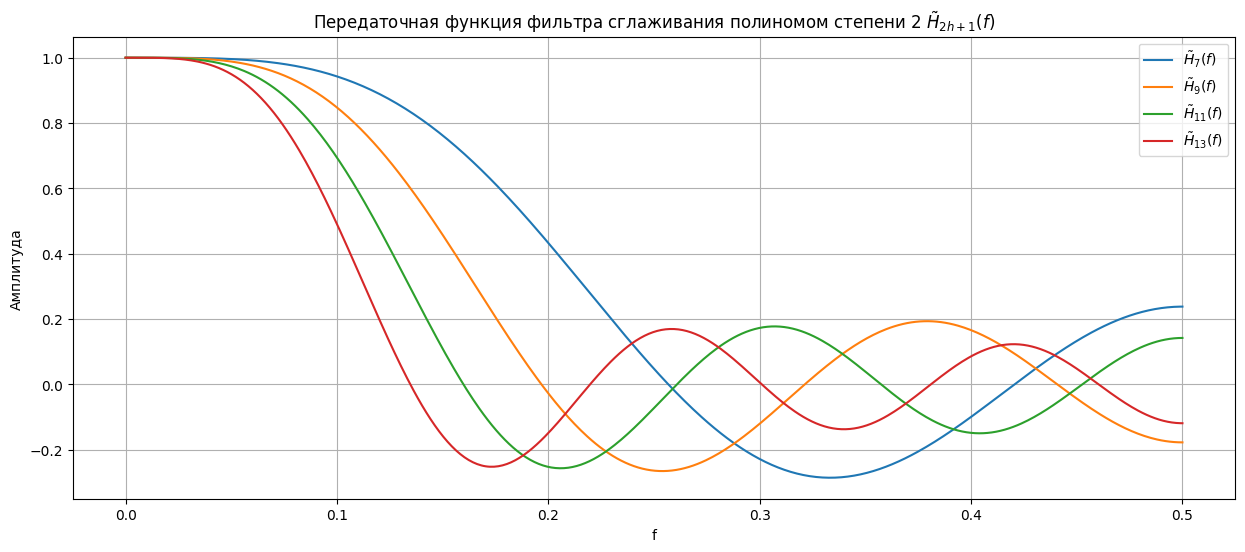

In [8]:
plt.figure(figsize=(15, 6))

for h in range(3, 7):
    plt.plot(f, H_tilde_quadratic(f, h), label="$ \\tilde{H}_{" + str(2 * h + 1) + "}(f) $")

plt.title('Передаточная функция фильтра сглаживания полиномом степени 2 $ \\tilde{H}_{2h+1}(f) $')
plt.ylabel('Амплитуда')
plt.xlabel('f')
plt.grid()
plt.legend()
plt.show()

### Выводы
Из графика видно, что с увеличением длины окна фильтра главная полоса передаточной функции становится уже, а боковые — менее выраженными. Это означает, что фильтр всё сильнее подавляет высокочастотные компоненты сигнала и обеспечивает более выраженное сглаживание, но при этом хуже реагирует на быстрые изменения данных.

По сравнению с фильтром на основе прямой, фильтр сглаживания полиномом второго порядка обладает более плавной амплитудно-частотной характеристикой: он лучше сохраняет форму сигнала в низкочастотной области и менее искажает данные на границах окна

- Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам. Построить графики $ \tilde H(f) $. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Нерекурсивный фильтр, соответствующий сглаживанию полиномом четвертой степени, задаётся формулой:

$$y(t) = A + Bt + Ct^2 + Dt^3 + Et^4$$

Для нахождения коэффициентов A, B, C, D и E решаем систему уравнений МНК:
$$
F_{2h + 1}(A, B, C, D, E) = \sum_{k=-h}^{k=h} (s_k - y_k)^2 = \sum_{k=-h}^{k=h} (s_k - A - Bk - Ck^2 - Dk^3 - Ek^4)^2 \to \min_{A, B, C, D, E}
$$

Берем частные производные по A, B, C, D и E и приравниваем их к нулю:
$$
\begin{cases}
    \frac{\partial F_{2h + 1}}{\partial A} = -2 \sum_{k=-h}^{k=h} (s_k - A - Bk - Ck^2 - Dk^3 - Ek^4) = 0 \\
    \frac{\partial F_{2h + 1}}{\partial B} = -2 \sum_{k=-h}^{k=h} k(s_k - A - Bk - Ck^2 - Dk^3 - Ek^4) = 0 \\
    \frac{\partial F_{2h + 1}}{\partial C} = -2 \sum_{k=-h}^{k=h} k^2(s_k - A - Bk - Ck^2 - Dk^3 - Ek^4) = 0 \\
    \frac{\partial F_{2h + 1}}{\partial D} = -2 \sum_{k=-h}^{k=h} k^3(s_k - A - Bk - Ck^2 - Dk^3 - Ek^4) = 0 \\
    \frac{\partial F_{2h + 1}}{\partial E} = -2 \sum_{k=-h}^{k=h} k^4(s_k - A - Bk - Ck^2 - Dk^3 - Ek^4) = 0
\end{cases}
$$

В этот раз выведем формулы для частных случаев.

Для 9 точек ($h=4$) получим систему нормальных уравнений:

$$
\begin{cases}
    9A + 60C + 708E = \sum s_k \\
    60B + 708D = \sum ks_k \\
    60A + 708C + 9780E = \sum k^2 s_k \\
    708B + 9780D = \sum k^3 s_k \\
    708A + 9780C + 144708E = \sum k^4 s_k
\end{cases}
$$

Тогда:
$$
y_0=A=\frac{1}{429}(15s_{-4} - 55s_{-3} + 30s_{-2} + 135s_{-1} + 179s_0 + 135s_1 + 30s_2 - 55s_3 + 15s_4)
$$

В общем случае:
$$
\begin{aligned}
y_n&=\frac{1}{429}(15s_{n-4} - 55s_{n-3} + 30s_{n-2} + 135s_{n-1} + 179s_n + 135s_{n+1} + 30s_{n+2} - 55s_{n+3} + 15s_{n+4}) \\
&=\frac{1}{429}(15e^{-4i\omega} - 55e^{-3i\omega} + 30e^{-2i\omega} + 135e^{-i\omega} + 179 + 135e^{i\omega} + 30e^{2i\omega} - e^{3i\omega} + 15e^{4i\omega})e^{i\omega n}=H_9(\omega)e^{i\omega n}
\end{aligned}
$$

Воспользуемся равенством $ \cos x = \frac{e^{ix} + e^{-ix}}{2} $ для преобразования передаточной функции, тогда:
$$
H(\omega)=\frac{1}{429}(179 + 270\cos(\omega) + 60\cos(2\omega) - 110\cos(3\omega) + 30\cos(4\omega))
$$

Вывод остальных формул строится аналогично.

11 точек:
$$
H_{11}(\omega)=\frac{1}{429}(143+240\cos(\omega)+120\cos(2\omega)-20\cos(3\omega)-90\cos(4\omega)+36\cos(5\omega))
$$

13 точек:
$$
H_{13}(\omega)=\frac{1}{2431}(677+1200\cos(\omega)+780\cos(2\omega)+220\cos(3\omega)-270\cos(4\omega)-396\cos(5\omega)+220\cos(6\omega))
$$

15 точек:
$$
H_{15}(\omega)=\frac{1}{46189}(11063+20250\cos(\omega)+15000\cos(2\omega)+7510\cos(3\omega)-330\cos(4\omega)-5874\cos(5\omega)-5720\cos(6\omega)+4290\cos(7\omega))
$$



In [19]:
_quartic_defs = {
    4: (179, [270, 60, -110, 30], 429),
    5: (143, [240, 120, -20, -90, 36], 429),
    6: (677, [1200, 780, 220, -270, -396, 220], 2431), 
    7: (11063, [20250, 15000, 7510, -330, -5874, -5720, 4290], 46189),
}

def H_tilde_quartic(f: np.ndarray, h: int) -> np.ndarray:
    a0, coeffs, denom = _quartic_defs[h]
    coeffs = np.asarray(coeffs, dtype=float)  # shape (K,)
    omega = 2.0 * np.pi * f                     # shape (N,)
    k = np.arange(1, coeffs.size + 1)           # shape (K,)
    cos_mat = np.cos(np.outer(omega, k))       # shape (N, K)
    return (a0 + cos_mat.dot(coeffs)) / denom


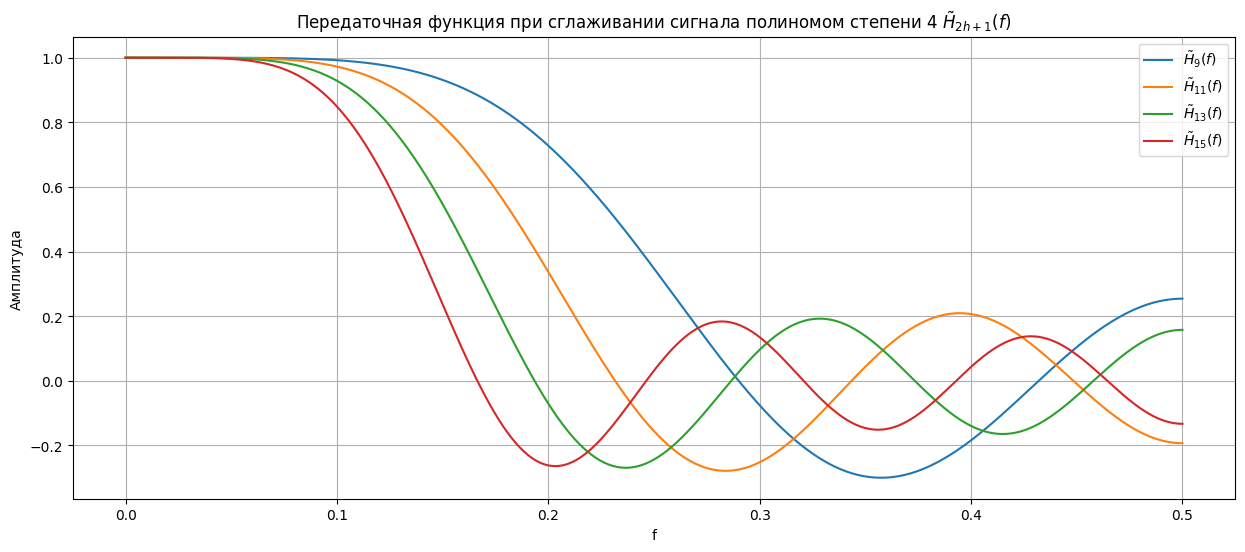

In [20]:
plt.figure(figsize=(15, 6))

for i in range(4, 8):
    plt.plot(f, H_tilde_quartic(f, i), label="$ \\tilde{H}_{" + str(2 * i + 1) + "}(f) $")
    
plt.title('Передаточная функция при сглаживании сигнала полиномом степени 4 $ \\tilde{H}_{2h+1}(f) $')
plt.ylabel('Амплитуда')
plt.xlabel('f')
plt.grid()
plt.legend()
plt.show()


### Выводы
Из графика видно, что при увеличении длины окна фильтра $2h+1$ главная полоса передаточной функции сужается, и фильтр сильнее подавляет высокочастотные компоненты сигнала и обеспечивает более качественное сглаживание по сравнению с фильтрами меньших порядков.

В то же время увеличение окна приводит к снижению чувствительности фильтра к быстрым изменениям сигнала - отклик становится более инерционным. По сравнению с предыдущими фильрами, фильтр четвёртой степени имеет более плавную амплитудно-частотную характеристику, лучше отделяет полезную низкочастотную составляющую от шума и сохраняет общую форму сигнала при сглаживании.

- Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 15 и 21 точкам. Построить графики $ \tilde H(f) $. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Выпишем формулы Спенсера для сглаживания по 15 и 21 точкам:

Формула Спенсера по 15 точкам:

$$
\begin{aligned}
y_n &= \frac{1}{320} (-3s_{n-7} - 6s_{n-6} - 5s_{n-5} + 3s_{n-4} + 21s_{n-3} + 46s_{n-2} + 67s_{n-1} + 74s_{n} + 67s_{n+1} + 46s_{n+2} + 21s_{n+3} + 3s_{n+4} - 5s_{n+5} - 6s_{n+6} - 3s_{n+7}) \\
&= \frac{1}{320} ( -3e^{i \omega (n-7)} - 6e^{i \omega (n-6)} - 5e^{i \omega (n-5)} + 3e^{i \omega (n-4)} + 21e^{i \omega (n-3)} + 46e^{i \omega (n-2)} + 67e^{i \omega (n-1)} + 74e^{i \omega n} + 67e^{i \omega (n+1)} + 46e^{i \omega (n+2)} + 21e^{i \omega (n+3)} + 3e^{i \omega (n+4)} - 5e^{i \omega (n+5)} - 6e^{i \omega (n+6)} - 3e^{i \omega (n+7)} ) = e^{i \omega n} H_{15} (\omega)
\end{aligned}
$$

Формула Спенсера по 21 точке:

$$
y_n = \frac{1}{350} (-1s_{n-10} - 3s_{n-9} - 5s_{n-8} - 5s_{n-7} - 2s_{n-6} + 6s_{n-5} + 18s_{n-4} + 33s_{n-3} + 47s_{n-2} + 57s_{n-1} + 60s_{n} + 57s_{n+1} + 47s_{n+2} + 33s_{n+3} + 18s_{n+4} + 6s_{n+5} - 2s_{n+6} - 5s_{n+7} - 5s_{n+8} - 3s_{n+9} - 1s_{n+10})
$$

При $s_n = e^{i \omega n}$, выходной сигнал для 15 точек будет:

$$
y_n = \frac{1}{320} ( -3e^{i \omega (n-7)} - 6e^{i \omega (n-6)} - 5e^{i \omega (n-5)} + 3e^{i \omega (n-4)} + 21e^{i \omega (n-3)} + 46e^{i \omega (n-2)} + 67e^{i \omega (n-1)} + 74e^{i \omega n} + 67e^{i \omega (n+1)} + 46e^{i \omega (n+2)} + 21e^{i \omega (n+3)} + 3e^{i \omega (n+4)} - 5e^{i \omega (n+5)} - 6e^{i \omega (n+6)} - 3e^{i \omega (n+7)} ) = e^{i \omega n} H_{15} (\omega)
$$

Передаточная функция фильтра для 15 точек будет:

$$
H_{15} (\omega) = \frac{1}{320} ( -3e^{-i 7 \omega} - 6e^{-i 6 \omega} - 5e^{-i 5 \omega} + 3e^{-i 4 \omega} + 21e^{-i 3 \omega} + 46e^{-i 2 \omega} + 67e^{-i \omega} + 74 + 67e^{i \omega} + 46e^{i 2 \omega} + 21e^{i 3 \omega} + 3e^{i 4 \omega} - 5e^{i 5 \omega} - 6e^{i 6 \omega} - 3e^{i 7 \omega} )
$$

Воспользуемся равенством $ \cos x = \frac{e^{ix} + e^{-ix}}{2} $ для преобразования передаточной функции, тогда:

$$
H_{15} (\omega) = \frac{1}{320} ( 74 + 2( 67 \cos(\omega) + 46 \cos(2 \omega) + 21 \cos(3 \omega) + 3 \cos(4 \omega) - 5 \cos(5 \omega) - 6 \cos(6 \omega) - 3 \cos(7 \omega) ) )
$$

Итого, $\tilde{H}_{15}(f)$ имеет вид:

$$
\tilde{H}_{15}(f) = H_{15} (2 \pi f) = \frac{1}{320} ( 74 + 2( 67 \cos(2 \pi f) + 46 \cos(4 \pi f) + 21 \cos(6 \pi f) + 3 \cos(8 \pi f) - 5 \cos(10 \pi f) - 6 \cos(12 \pi f) - 3 \cos(14 \pi f) ) )
$$

Аналогично, для 21 точки:

$$
\tilde{H}(f) = H (2 \pi f) = \frac{1}{350} ( 60 + 2( 57 \cos(2 \pi f) + 47 \cos(4 \pi f) + 33 \cos(6 \pi f) + 18 \cos(8 \pi f) + 6 \cos(10 \pi f) - 2 \cos(12 \pi f) - 5 \cos(14 \pi f) - 5 \cos(16 \pi f) - 3 \cos(18 \pi f) - 1 \cos(20 \pi f) ) )
$$


In [36]:
_spencer_defs = {
    7: (74, [67, 46, 21, 3, -5, -6, -3], 320),
    10: (60, [57, 47, 33, 18, 6, -2, -5, -5, -3, -1], 350),
}

def H_tilde_spencer(f: np.ndarray, h: int) -> np.ndarray:
    a0, coeffs, denom = _spencer_defs[h]
    k = np.arange(1, len(coeffs) + 1)
    cos_mat = np.cos(2 * np.pi * np.outer(f, k))
    return (a0 + 2.0 * cos_mat.dot(np.asarray(coeffs))) / denom

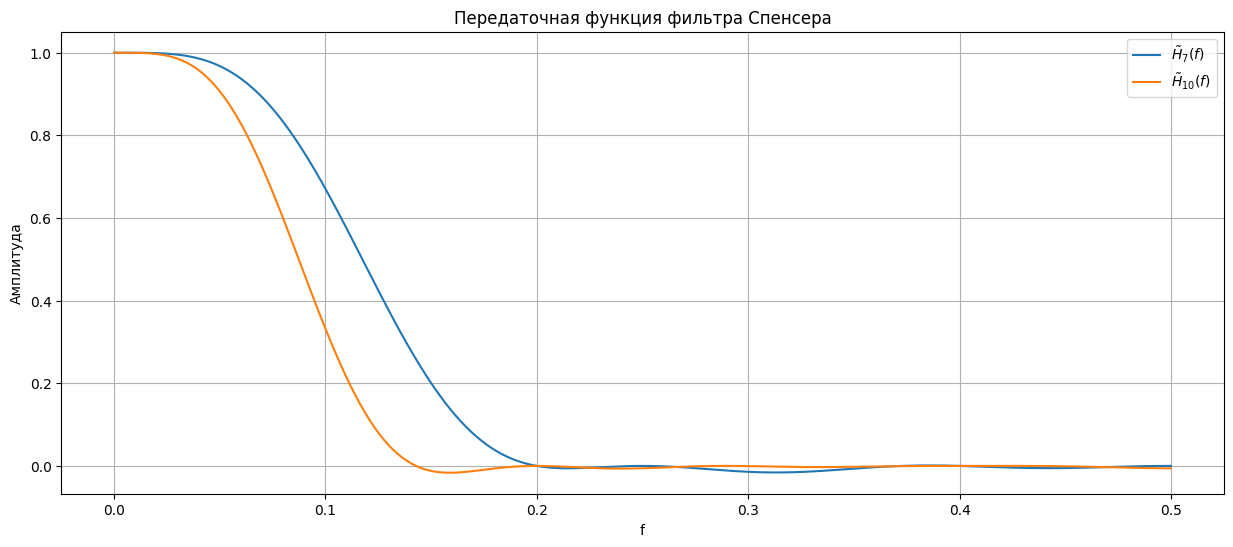

In [38]:
plt.figure(figsize=(15, 6))

for h in (7, 10):
    plt.plot(f, H_tilde_spencer(f, h), label=f"$\\tilde{{H}}_{{{h}}}(f)$")

plt.title('Передаточная функция фильтра Спенсера')
plt.xlabel('f')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()
plt.show()


Из графиков видно, что фильтры Спенсера также являются низкочастотными. В отличие от предыдущих фильтров, они не демонстрируют значительных колебаний амплитуды передаточной функции при увеличении частоты.

- Построить графики из предыдущих пунктов в логарифмической шкале (Дб). Объясните, чем отличаются данные графики от полученных ранее и объясните их смысл.

In [50]:
def amplitude_to_db(H, floor_db=-170.0):
    """
    Convert complex or real frequency response H to dB scale.
    Small magnitudes are floored to `floor_db` to avoid -inf.
    """
    abs_H = np.abs(H)
    floor_lin = 10.0 ** (floor_db / 20.0)
    clipped = np.maximum(abs_H, floor_lin)
    return 20.0 * np.log10(clipped)

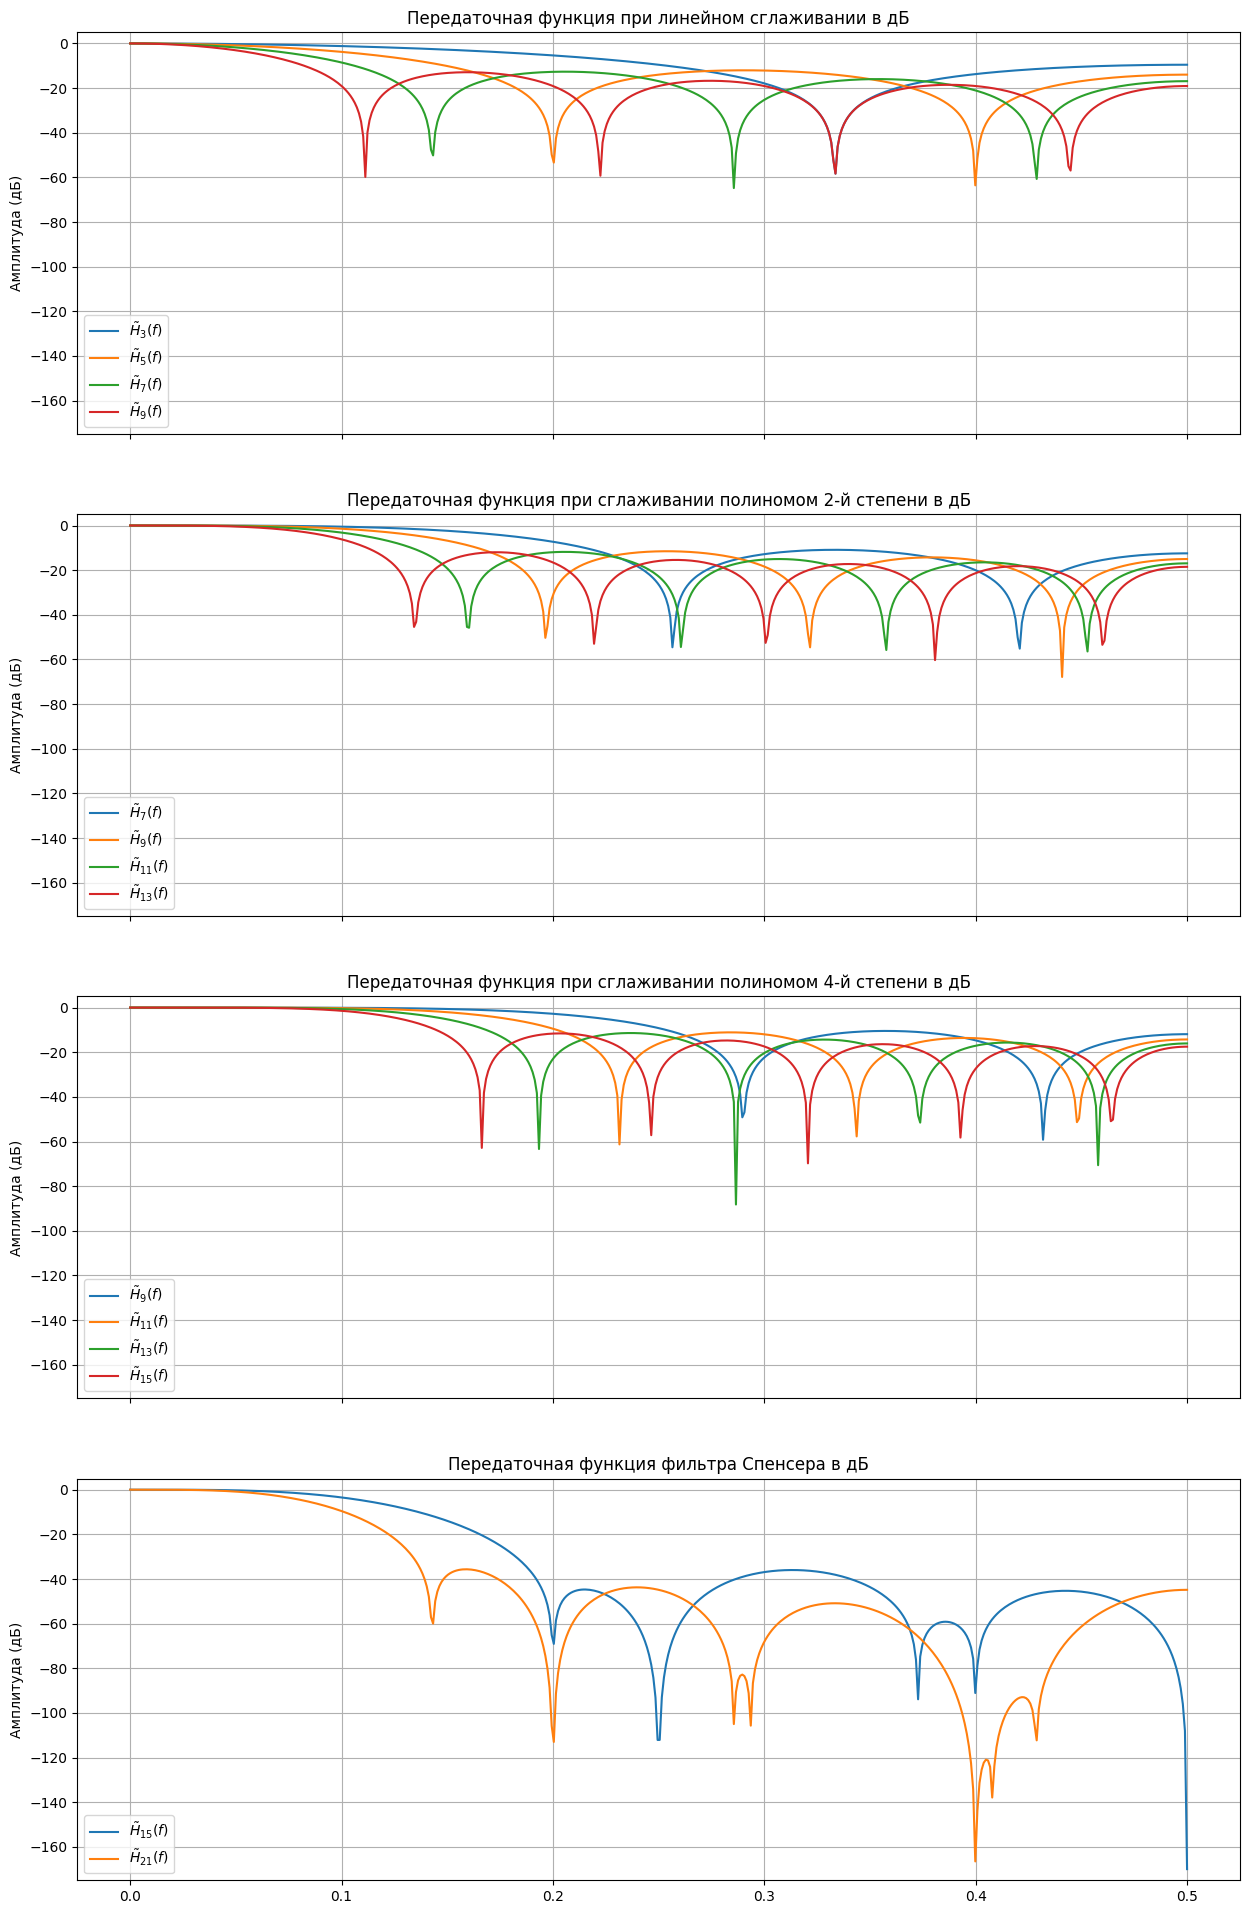

In [52]:
fig, axs = plt.subplots(4, 1, figsize=(15, 24), sharex=True, sharey=True)

hs = (range(1, 5), range(3, 7), range(4, 8), (7, 10))
funcs = (H_tilde_linear, H_tilde_quadratic, H_tilde_quartic, H_tilde_spencer)
titles = ('Передаточная функция при линейном сглаживании в дБ', 'Передаточная функция при сглаживании полиномом 2-й степени в дБ', 
          'Передаточная функция при сглаживании полиномом 4-й степени в дБ', 'Передаточная функция фильтра Спенсера в дБ')

for ax, hs, func, title in zip(axs, hs, funcs, titles):
    for h in hs:
        ax.plot(f, amplitude_to_db(func(f, h)), label=f"$\\tilde{{H}}_{{{2*h+1}}}(f)$")
    ax.set_title(title)
    ax.set_ylabel('Амплитуда (дБ)')
    ax.grid(True)
    ax.legend(loc='lower left')

axs[0].set_ylim(-175, 5)

plt.show()

Из графиков передаточных функций в линейной (амплитудной) и логарифмической (децибел) шкалах видно, что в амплитудной шкале удобно оценивать поведение фильтра в полосе пропускания — насколько сильно ослабляется сигнал в диапазоне низких частот (0–1). Однако мелкие изменения на низких уровнях (в области подавления) практически неразличимы.

В шкале дБ те же данные представлены в логарифмическом виде, что позволяет чётко видеть глубину подавления высокочастотных компонентов и форму переходной области. Таким образом, амплитудная шкала нагляднее показывает основную форму фильтра, а шкала в дБ — эффективность подавления сигнала вне полосы пропускания.

- Провести сопоставительный анализ свойств передаточных функций, полученных при выполнении п. 1 -- 4.

В ходе лабораторной работы установлено, что все рассмотренные фильтры -- полиномиальные и фильтр Спенсера -- обладают низкочастотным характером, эффективно пропуская медленно меняющиеся компоненты сигнала и подавляя высокочастотные шумы. Увеличение числа точек сглаживания приводит к сужению полосы пропускания и усилению подавления высоких частот. Повышение степени полинома расширяет полосу пропускания, но вызывает колебания в области подавления.

Фильтр Спенсера отличается наилучшей частотной избирательностью: он обеспечивает наиболее глубокое и равномерное подавление высокочастотных компонентов без выраженных колебаний, что делает его наиболее качественным средством сглаживания среди исследованных фильтров.

## Выводы

В ходе лабораторной работы были исследованы частотные характеристики различных фильтров сглаживания дискретных сигналов -- полиномиальных фильтров 1-й, 2-й и 4-й степени, а также фильтра Спенсера. На основе анализа амплитудных и логарифмических (в дБ) передаточных функций были выявлены особенности каждого типа фильтра и их влияние на частотный спектр обрабатываемого сигнала.

Все исследованные фильтры относятся к классу фильтров нижних частот. Их общая особенность заключается в том, что при увеличении частоты входного сигнала амплитуда передаточной функции уменьшается, то есть высокочастотные компоненты подавляются, а низкочастотные проходят без значительных искажений. Это делает такие фильтры эффективным инструментом для сглаживания случайных колебаний и выделения медленно меняющихся тенденций в данных.

Наилучшие характеристики показал фильтр Спенсера, обеспечивающий более равномерное и глубокое подавление высокочастотных составляющих при сохранении плавного поведения в области низких частот.